<a href="https://colab.research.google.com/github/omardrho/DeepTweet/blob/main/oraclenb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


Discovering the data

In [ ]:
df1=pd.read_csv("/content/sample_submission.csv")
df_test=pd.read_csv("/content/test.csv")
df_train=pd.read_csv("/content/train.csv")
df_training=pd.read_csv("/content/training.csv")

In [ ]:
df1

,TweetId,Label
0,13439423987429,Sports
1,48523497520948,Politics
2,183749287598,Sports
3,12749274958729,Sports


In [ ]:
df_test

,TweetId,TweetText
0,306486520121012224,'28. The home side threaten again through Maso...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....
2,289531046037438464,'@Sochi2014 construction along the shores of t...
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...
...,...,...
2605,282023761044189184,'Qualifier 1 and Eliminator games will be play...
2606,303879735006601216,"@reesedward Hi Edward, it's not a #peacekeepin..."
2607,297956846046703616,'Perera was @SunRisersIPL first #IPL purchase ...
2608,304265049537658880,"'#SecKerry: Thanks to Senator @TimKaine, @RepR..."


In [ ]:
label=df_train['Label']
text=df_train['TweetText']
tweetId=df_train['TweetId']

In [ ]:
df_train

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...
...,...,...,...
6520,296675082267410433,Politics,'Photo: PM has laid a wreath at Martyrs Monume...
6521,306677536195231746,Sports,'The secret of the Chennai pitch - crumbling o...
6522,306451295307431937,Sports,@alinabhutto he isn't on Twitter either
6523,306088574221176832,Sports,'Which England player would you take out to di...


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
label_counts = label.value_counts()
label_counts

Sports      3325
Politics    3200
Name: Label, dtype: int64

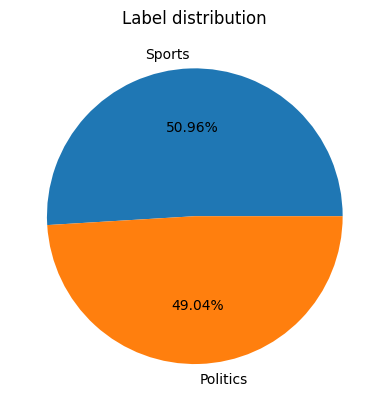

In [ ]:

plt.pie(label_counts, labels=label_counts.index,autopct="%.2f%%")

# add title
plt.title('Label distribution')

# show the plot
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
df=df_train

In [ ]:
import re

Punctuation Removal

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:


def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree



In [ ]:
df['cleanTweet']= df['TweetText'].apply(lambda x:remove_punctuation(x))
df.head()

,TweetId,Label,TweetText,cleanTweet
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,SecKerry The value of the StateDept and USAID ...
1,304834304222064640,Politics,'@rraina1481 I fear so',rraina1481 I fear so
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,Watch video highlights of the wwc13 final betw...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,RT chelscanlan At Nitro Circus at AlbertPark ...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,cricketfox Always a good thing Thanks for the ...


Lower Case

In [ ]:
df['cleanTweet']= df['cleanTweet'].apply(lambda x: x.lower())
df

,TweetId,Label,TweetText,cleanTweet
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,seckerry the value of the statedept and usaid ...
1,304834304222064640,Politics,'@rraina1481 I fear so',rraina1481 i fear so
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,watch video highlights of the wwc13 final betw...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,rt chelscanlan at nitro circus at albertpark ...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,cricketfox always a good thing thanks for the ...
...,...,...,...,...
6520,296675082267410433,Politics,'Photo: PM has laid a wreath at Martyrs Monume...,photo pm has laid a wreath at martyrs monument...
6521,306677536195231746,Sports,'The secret of the Chennai pitch - crumbling o...,the secret of the chennai pitch crumbling on ...
6522,306451295307431937,Sports,@alinabhutto he isn't on Twitter either,alinabhutto he isnt on twitter either
6523,306088574221176832,Sports,'Which England player would you take out to di...,which england player would you take out to din...


convert the numbers into words

In [ ]:
!pip install inflect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import inflect

In [ ]:

p = inflect.engine()
 
# convert number into words
def convert_number(text):
    # split string into list of words
    temp_str = text.split()
    # initialise empty list
    new_string = []
 
    for word in temp_str:
        # if word is a digit, convert the digit
        # to numbers and append into the new_string list
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
 
        # append the word as it is
        else:
            new_string.append(word)
 
    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    return temp_str
 

In [ ]:
df['cleanTweet'] = df['cleanTweet'].astype(str).apply(lambda x: convert_number(x))
df

,TweetId,Label,TweetText,cleanTweet
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,seckerry the value of the statedept and usaid ...
1,304834304222064640,Politics,'@rraina1481 I fear so',rraina1481 i fear so
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,watch video highlights of the wwc13 final betw...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,rt chelscanlan at nitro circus at albertpark t...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,cricketfox always a good thing thanks for the ...
...,...,...,...,...
6520,296675082267410433,Politics,'Photo: PM has laid a wreath at Martyrs Monume...,photo pm has laid a wreath at martyrs monument...
6521,306677536195231746,Sports,'The secret of the Chennai pitch - crumbling o...,the secret of the chennai pitch crumbling on t...
6522,306451295307431937,Sports,@alinabhutto he isn't on Twitter either,alinabhutto he isnt on twitter either
6523,306088574221176832,Sports,'Which England player would you take out to di...,which england player would you take out to din...


In [ ]:
df['cleanTweet'] = df['cleanTweet'].astype(str).apply(lambda x: re.sub(r'\d+', '', x))
df

,TweetId,Label,TweetText,cleanTweet
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,seckerry the value of the statedept and usaid ...
1,304834304222064640,Politics,'@rraina1481 I fear so',rraina i fear so
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,watch video highlights of the wwc final betwee...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,rt chelscanlan at nitro circus at albertpark t...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,cricketfox always a good thing thanks for the ...
...,...,...,...,...
6520,296675082267410433,Politics,'Photo: PM has laid a wreath at Martyrs Monume...,photo pm has laid a wreath at martyrs monument...
6521,306677536195231746,Sports,'The secret of the Chennai pitch - crumbling o...,the secret of the chennai pitch crumbling on t...
6522,306451295307431937,Sports,@alinabhutto he isn't on Twitter either,alinabhutto he isnt on twitter either
6523,306088574221176832,Sports,'Which England player would you take out to di...,which england player would you take out to din...


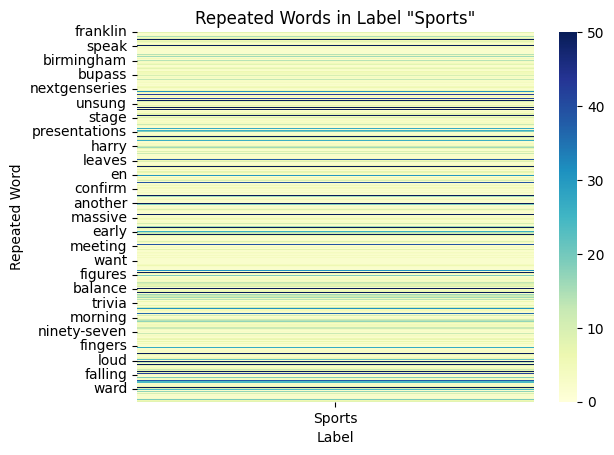

In [ ]:
label_plot = 'Sports'

# create a list of repeated words for the chosen label
words = ' '.join(df[df['Label']==label_plot]['cleanTweet']).split()
repeated_words = [word for word in set(words) if words.count(word) > 1]

# create a dictionary that maps each label to the count of each repeated word
count_dict = {}
counts = [words.count(word) for word in repeated_words]
count_dict[label_plot] = counts

# create a heatmap showing the count of each repeated word for the chosen label
sns.heatmap(data=pd.DataFrame(count_dict, index=repeated_words), cmap='YlGnBu',vmin=0, vmax=50)

# add a title and axis labels
plt.title(f'Repeated Words in Label "{label_plot}"')
plt.xlabel('Label')
plt.ylabel('Repeated Word')

# show the plot
plt.show()

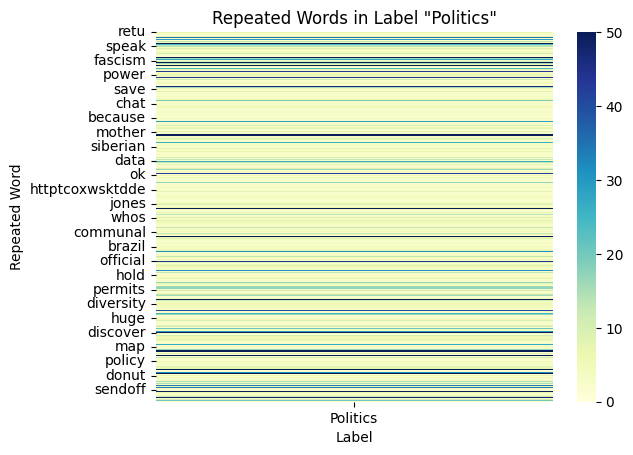

In [ ]:
label_plot = 'Politics'

# create a list of repeated words for the chosen label
words = ' '.join(df[df['Label']==label_plot]['cleanTweet']).split()
repeated_words = [word for word in set(words) if words.count(word) > 1]

# create a dictionary that maps each label to the count of each repeated word
count_dict = {}
counts = [words.count(word) for word in repeated_words]
count_dict[label_plot] = counts

# create a heatmap showing the count of each repeated word for the chosen label
sns.heatmap(data=pd.DataFrame(count_dict, index=repeated_words), cmap='YlGnBu',vmin=0, vmax=50)

# add a title and axis labels
plt.title(f'Repeated Words in Label "{label_plot}"')
plt.xlabel('Label')
plt.ylabel('Repeated Word')

# show the plot
plt.show()

**Tockenization**

In [ ]:
# from transformers import AutoTokenizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#tokenize and tag the card text
card = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(df['cleanTweet'])]


In [ ]:
# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = Doc2Vec(vector_size=64, min_count=1, epochs = 20)

In [ ]:
!pip install --upgrade tensorflow_hub
import tensorflow_hub as hub
#download the model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#generate embeddings
embeddings = embed(df['cleanTweet'])
#create list from np arrays
l= np.array(embeddings).tolist()
#add lists as dataframe column
df['cleanTweet'] = l

In [ ]:
df

,TweetId,Label,TweetText,cleanTweet
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,"[0.05194786563515663, 0.06084591895341873, 0.0..."
1,304834304222064640,Politics,'@rraina1481 I fear so',"[0.060209594666957855, 0.0032878369092941284, ..."
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,"[-0.07355615496635437, 0.024096090346574783, -..."
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,"[-0.015561909414827824, 0.015054982155561447, ..."
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,"[-0.03456810861825943, -0.01699013076722622, 0..."
...,...,...,...,...
6520,296675082267410433,Politics,'Photo: PM has laid a wreath at Martyrs Monume...,"[-0.045163966715335846, -0.01666395179927349, ..."
6521,306677536195231746,Sports,'The secret of the Chennai pitch - crumbling o...,"[-0.03483624383807182, 0.025826014578342438, -..."
6522,306451295307431937,Sports,@alinabhutto he isn't on Twitter either,"[0.028665121644735336, -0.007298152893781662, ..."
6523,306088574221176832,Sports,'Which England player would you take out to di...,"[-0.030342215672135353, -0.0001615944493096321..."


In [ ]:
import torch
df['Label'] = torch.tensor(df['Label'].map({'Politics': 0, 'Sports': 1}).values)
df

,TweetId,Label,TweetText,cleanTweet
0,304271250237304833,0,'#SecKerry: The value of the @StateDept and @U...,"[0.05194786563515663, 0.06084591895341873, 0.0..."
1,304834304222064640,0,'@rraina1481 I fear so',"[0.060209594666957855, 0.0032878369092941284, ..."
2,303568995880144898,1,'Watch video highlights of the #wwc13 final be...,"[-0.07355615496635437, 0.024096090346574783, -..."
3,304366580664528896,1,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,"[-0.015561909414827824, 0.015054982155561447, ..."
4,296770931098009601,1,'@cricketfox Always a good thing. Thanks for t...,"[-0.03456810861825943, -0.01699013076722622, 0..."
...,...,...,...,...
6520,296675082267410433,0,'Photo: PM has laid a wreath at Martyrs Monume...,"[-0.045163966715335846, -0.01666395179927349, ..."
6521,306677536195231746,1,'The secret of the Chennai pitch - crumbling o...,"[-0.03483624383807182, 0.025826014578342438, -..."
6522,306451295307431937,1,@alinabhutto he isn't on Twitter either,"[0.028665121644735336, -0.007298152893781662, ..."
6523,306088574221176832,1,'Which England player would you take out to di...,"[-0.030342215672135353, -0.0001615944493096321..."


In [ ]:
df0=df[['cleanTweet','Label']]

In [ ]:
df.loc[:, "cleanTweet"] = df0["cleanTweet"].apply(lambda x: np.array(x))

In [ ]:
# df0.loc[:, 'card2vec'] = df0['card2vec'].apply(lambda x: tuple(x))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = np.array(df0["cleanTweet"].tolist())
y=df0['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2)
print(X_train.shape, y_train.shape) 
print (X_test.shape, y_test.shape)

(5220, 512) (5220,)
(1305, 512) (1305,)


In [ ]:
X_train

array([[-0.00763065, -0.00945272, -0.02515738, ...,  0.06114792,
        -0.06051751,  0.01071396],
       [ 0.00824869, -0.01585084,  0.06896037, ..., -0.03267232,
        -0.06478972,  0.00818661],
       [-0.02179175, -0.05760642, -0.01699875, ...,  0.07573798,
         0.00940558, -0.03438176],
       ...,
       [-0.05993133,  0.01534647, -0.07306244, ...,  0.07390739,
        -0.04609735, -0.02720208],
       [-0.04141924,  0.04362325,  0.02813975, ...,  0.02719901,
         0.00232632,  0.01673991],
       [-0.04260635, -0.07616252, -0.0126402 , ...,  0.05123036,
        -0.04478274,  0.04770698]])

In [ ]:
params = {
    'objective': 'binary:logistic', # for binary classification problems
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': 1,
    'seed': 42
}

In [ ]:
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score ,classification_report
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression accuracy:", lr_accuracy)
print(classification_report(y_test, lr_predictions))

Logistic Regression accuracy: 0.9356321839080459
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       642
           1       0.94      0.93      0.94       663

    accuracy                           0.94      1305
   macro avg       0.94      0.94      0.94      1305
weighted avg       0.94      0.94      0.94      1305



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
algos = [
    RandomForestClassifier(random_state=52),
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(probability=True)
]

df = {"Model": [], "Roc_Auc Score": [], "Score":[],"Cross validation score":[]}
for algo in algos:
    model = algo.fit(X_train, y_train)
    y_pred = algo.predict_proba(X_test)[:, 1]
    df["Model"].append(str(algo)[:str(algo).find('(')])
    df["Roc_Auc Score"].append(roc_auc_score(y_test, y_pred))
    df['Score'].append(algo.score(X_test, y_test))
    df['Cross validation score'].append(cross_val_score(algo, X, y, cv=5).mean())

models = pd.DataFrame(df)

In [ ]:
models

,Model,Roc_Auc Score,Score,Cross validation score
0,RandomForestClassifier,0.984222,0.926437,0.928429
1,GaussianNB,0.980802,0.902682,0.908046
2,DecisionTreeClassifier,0.860476,0.860536,0.867893
3,KNeighborsClassifier,0.985046,0.947126,0.946973
4,LogisticRegression,0.985551,0.935632,0.937318
5,SVC,0.989066,0.938697,0.947586


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# xgb_model = xgb.XGBClassifier()

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring="accuracy")
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)

# # Train a new model with the best hyperparameters
# best_model = xgb.XGBClassifier(**grid_search.best_params_)
# best_model.fit(X_train, y_train)

# # Make predictions on the testing data
# predictions = best_model.predict(X_test)

# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)

# # Print classification report
# classification_report = classification_report(y_test, predictions)
# print(classification_report)

In [ ]:
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9272030651340997


In [ ]:
X_test

array([[-0.1043143 , -0.0232775 ,  0.07690922, ..., -0.0280163 ,
        -0.02508587, -0.05278791],
       [ 0.02871097,  0.04156153,  0.01960446, ..., -0.02509295,
         0.01468728, -0.0155949 ],
       [-0.02239161, -0.02533315, -0.02327068, ...,  0.02070605,
        -0.04626243, -0.00170097],
       ...,
       [-0.00168516, -0.04731005,  0.01997236, ..., -0.03255226,
         0.06615246,  0.09513507],
       [-0.00238353,  0.06456651, -0.07683657, ...,  0.00725745,
        -0.02036353, -0.03175851],
       [-0.01966137, -0.0520432 , -0.04407882, ..., -0.02424389,
        -0.07277816, -0.00055192]])

In [ ]:
df_test.drop(columns='TweetId',inplace=True)

In [ ]:
df_test

,TweetText
0,"[0.002254967810586095, -0.006261159665882587, ..."
1,"[0.014300375245511532, 0.0220290869474411, 0.0..."
2,"[0.04784267395734787, 0.011439655907452106, -0..."
3,"[0.0028955598827451468, 0.018496178090572357, ..."
4,"[0.008131434209644794, 0.02689247950911522, -0..."
...,...
2605,"[-0.027031399309635162, 0.04198688641190529, -..."
2606,"[-0.007236842066049576, -0.0013755988329648972..."
2607,"[0.022156380116939545, 0.0607798770070076, -0...."
2608,"[-0.02126934565603733, 0.03575687110424042, -0..."


In [ ]:
#generate embeddings
embeddings = embed(df_test['TweetText'])
#create list from np arrays
l= np.array(embeddings).tolist()
#add lists as dataframe column
df_test['TweetText'] = l

In [ ]:
test = np.vstack(df_test['TweetText'].values)

In [ ]:
test

array([[ 0.00225497, -0.00626116, -0.03135303, ...,  0.03437252,
         0.05570615,  0.01645176],
       [ 0.01430038,  0.02202909,  0.08898865, ..., -0.04145415,
        -0.05117686, -0.00341042],
       [ 0.04784267,  0.01143966, -0.05697962, ...,  0.07053477,
        -0.05607738, -0.00884014],
       ...,
       [ 0.02215638,  0.06077988, -0.00656425, ..., -0.07747123,
         0.02299387, -0.00762836],
       [-0.02126935,  0.03575687, -0.09848572, ..., -0.04101799,
        -0.00108545, -0.02838863],
       [-0.03081543, -0.01297888,  0.03312621, ...,  0.03859508,
         0.04551147, -0.02172269]])

In [ ]:
y_pred = xgb_model.predict(test)


In [ ]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])